<a href="https://colab.research.google.com/github/stanleyhuang12/ds542-deep-learning/blob/main/hw2_part2_deep_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initialize Otter
# You can ignore this cell if you are working on Google Colab
# Otherwise, if you are running in a local environment you can `pip install otter-grader`
import otter
grader = otter.Notebook("hw2-part2-deep-networks.ipynb")

# HW2 Part 2 -- Deep Networks

<a href="https://colab.research.google.com/github/DL4DS/sp2026/blob/main/static_files/assignments/hw2-part2-deep-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from UDL companion notebooks.

## Section 1 -- Composing networks

The purpose of this section is to understand what happens when we feed one neural network into another. It works through an example similar to 4.1 and varies both networks

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

In [2]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

<!-- BEGIN QUESTION -->

### Question 1.1 (5 points)

Define the ReLU function and the shallow network function for one input, one output, and three hidden units as you did in part 1, Shallow Networks.

In [3]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  # TODO complete the line below to implement the ReLU.
  activation = np.clip(preactivation, 0, None)
  return activation

In [4]:
# Define a shallow neural network with, one input, one output, and three hidden units
# TODO complete the lines below.
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + (theta_11 * x)
  pre_2 = theta_20 + (theta_21 * x)
  pre_3 = theta_30 + (theta_31 * x)
  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y


<!-- END QUESTION -->

We supply a function to plot two shallow networks and the composition of the two.

In [5]:
# # Plot two shallow neural networks and the composition of the two
def plot_neural_two_components(x_in, net1_out, net2_out, net12_out=None):

  # Plot the two networks separately
  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_in, net1_out,'r-')
  ax[0].set_xlabel('Net 1 input'); ax[0].set_ylabel('Net 1 output')
  ax[0].set_xlim([-1,1]);ax[0].set_ylim([-1,1])
  ax[0].set_aspect(1.0)
  ax[1].plot(x_in, net2_out,'b-')
  ax[1].set_xlabel('Net 2 input'); ax[1].set_ylabel('Net 2 output')
  ax[1].set_xlim([-1,1]);ax[1].set_ylim([-1,1])
  ax[1].set_aspect(1.0)
  plt.show()

  if net12_out is not None:
    # Plot their composition
    fig, ax = plt.subplots()
    ax.plot(x_in ,net12_out,'g-')
    ax.set_xlabel('Net 1 Input'); ax.set_ylabel('Net 2 Output')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
    ax.set_aspect(1.0)
    plt.show()

### Define two networks

Let's define two networks.  We'll put the prefixes n1_ and n2_ before all the variables to make it clear which network is which.  We'll just consider the inputs and outputs over the range [-1,1].

In [6]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0


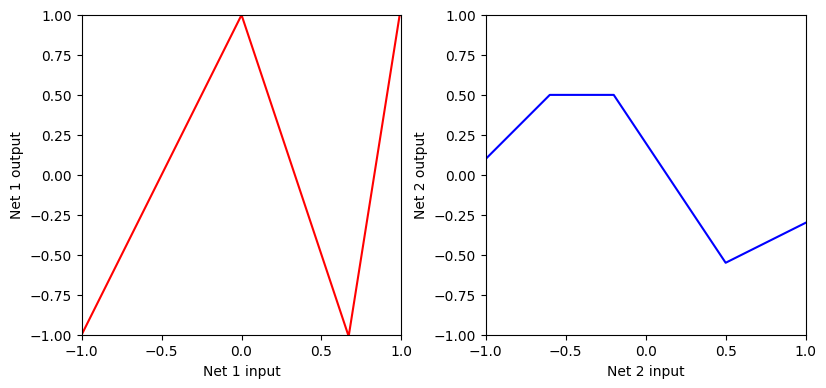

In [7]:
# Display the two inputs
x = np.arange(-1,1,0.001)
# We run the first  and second neural networks for each of these input values
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# Plot both graphs
plot_neural_two_components(x, net1_out, net2_out)

The output should look like this:

<!-- ![fig1-two-shallow-nets.png](attachment:0f7514f5-62a4-4537-9c87-e393a06cf3e0.png) [link text](https://) -->

### Optional Question

Take a piece of paper and draw what you think will happen when we feed the output of the first network into the second one.  Draw the relationship between the input of the first network and the output of the second one. You can use the folding and mirroring method from the book and class.

<!-- BEGIN QUESTION -->

### Question 1.2 (2 points)
Now let's see if your predictions were right.

In [8]:
# TODO feed the output of first network into second network (replace this line)
net12_out =  shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

<!-- END QUESTION -->



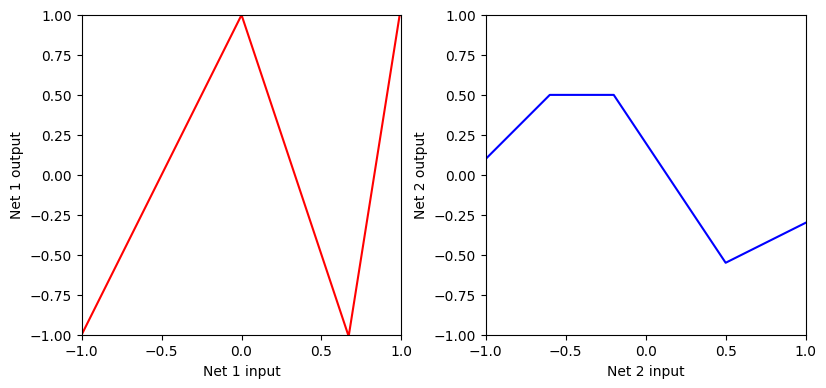

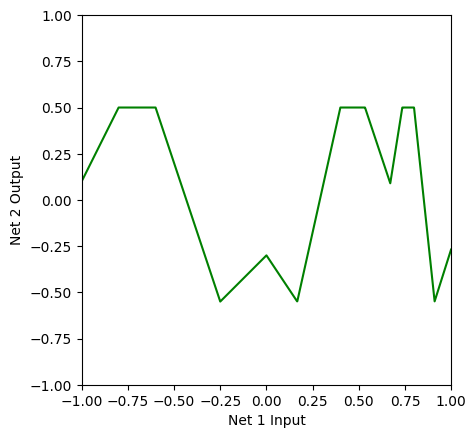

In [9]:
# Plot all three graphs
plot_neural_two_components(x, net1_out, net2_out, net12_out)

Can you see where the "folds" are and when the copies are mirrored or not?

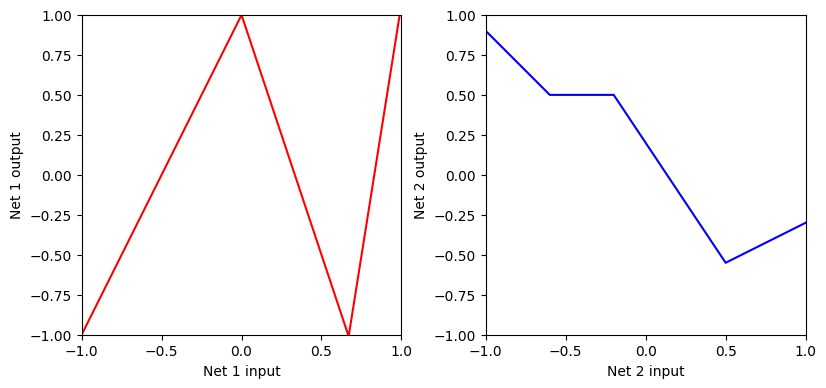

In [10]:
# Now we'll change things a up a bit.  What happens if we change the second network? (note the *-1 change)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

### Optional Question

Using the mirroring and folding method again, draw what you think is the new output of the second network before running the code below.

When you have a prediction, run this code to see if you were right.

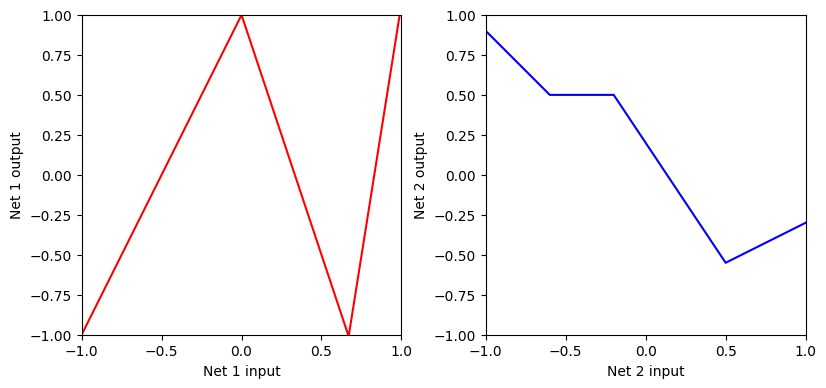

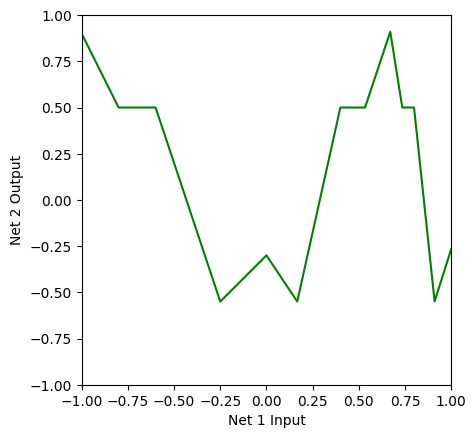

In [11]:
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_out)

Let's change things again.  What happens if the first network and second networks are the same?

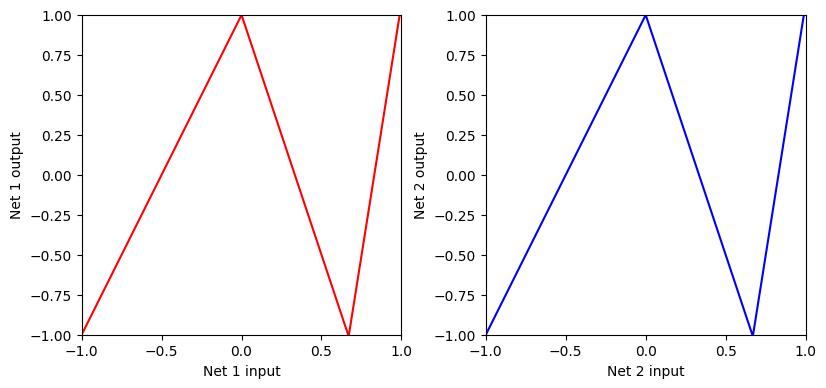

In [12]:
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out_new = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new)

### Optional Question

Before you run the code below, think about what the output will look like.

When you have a prediction, run this code to see if you were right.

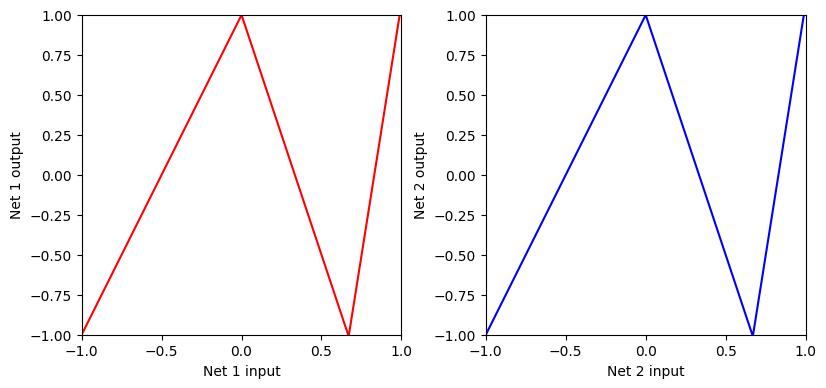

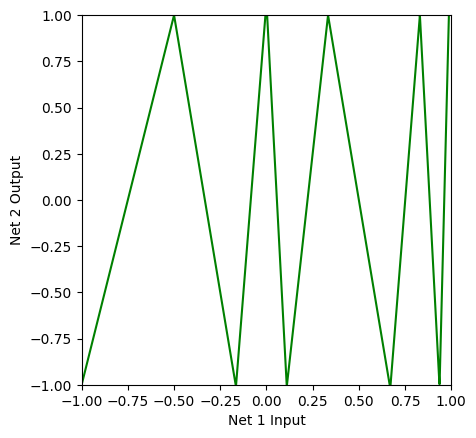

In [13]:
net12_out = shallow_1_1_3(net1_out, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new, net12_out)

### Optional Question

Contemplate what you think will happen when we feed the output of the original first network into a second copy of the original first network, and then the output of that into the original second network (so now we have a three layer network) How many total linear regions will we have in the output?

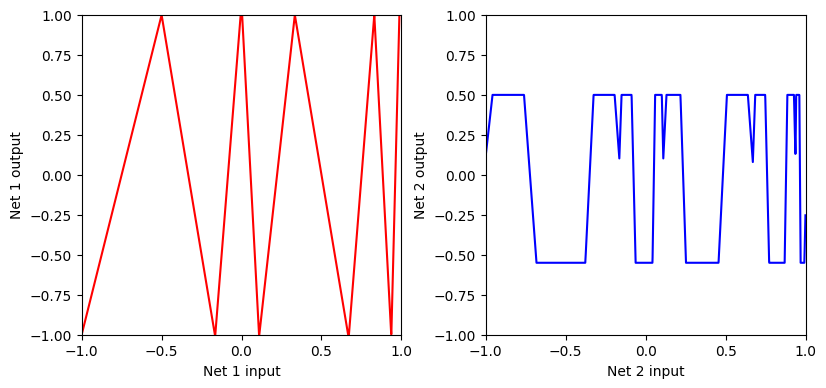

In [21]:
net123_out_1 = shallow_1_1_3(net12_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
net123_out_2 = shallow_1_1_3(net123_out_1, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
net123_out_3 = shallow_1_1_3(net123_out_2, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

plot_neural_two_components(x, net12_out, net123_out_3)

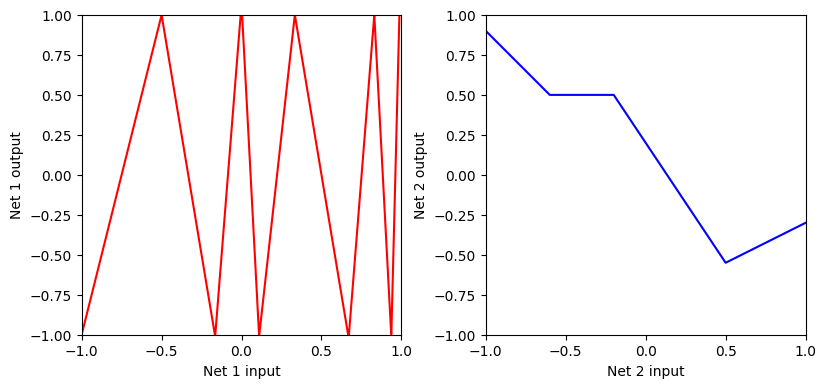

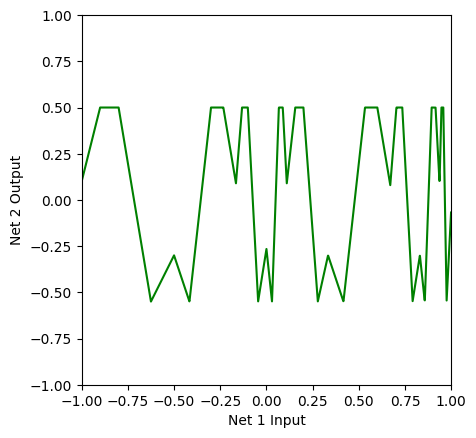

In [22]:
net123_out = shallow_1_1_3(net12_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net12_out, net2_out, net123_out)

<!-- BEGIN QUESTION -->

### Question 1.3 (2 points)

How many linear regions would there be if we ran N copies of the first network, feeding the result of the first into the second, the second into the third and so on, and then passed the result into the original second network (blue curve above).


**We would get the same regions because the first network already learns specific boundaries conditional on specific input values. If we were to pass N copies over the first network, we wouldn't get new  boundaries but the same boundaries, but likely linear regions that look the same. Thus, if we feed the copy to second network, we would get the same number of linear regions but those linear relationships might look different. To be more specific, we would get around 30+ regions as in the net2 output from the image above. **

<!-- END QUESTION -->

Take away conclusion:  with very few parameters, we can make A LOT of linear regions, but they depend on one another in complex ways that quickly become too difficult to understand intuitively.


---


## Section 2 -- Clipping functions

The purpose of this section is to understand how a neural network with two hidden layers build more complicated functions by clipping and recombining the representations at the intermediate hidden variables.

<!-- BEGIN QUESTION -->

### Question 2.1 (5 points)

Define a deep neural network with, one input, one output, two hidden layers and three hidden units (eqns 4.7-4.9 and Figure 4.4)

In [23]:
# To make this easier, we store the parameters in ndarrays,
# theta_10 = theta[1,0] and psi_3,3 = psi[3,3] etc.
#
# Although the parameters are now vectors and matrices, we will still use
# them in scalar operations at least for now.
def shallow_1_1_3_3(x, activation_fn, phi, psi, theta):

  # TODO -- You write this function
  # Complete the lines below to implement the function.

  # ANSWER
  # Preactivations at layer 1 (terms in brackets in equation 4.7)
  layer1_pre_1 = theta[1, 0] + theta[1, 1] * x
  layer1_pre_2 = theta[2, 0] + theta[2, 1] * x
  layer1_pre_3 = theta[3, 0] + theta[3, 1] * x

  # Activation functions (rest of equation 4.7)
  h1 = activation_fn(layer1_pre_1)
  h2 = activation_fn(layer1_pre_2)
  h3 = activation_fn(layer1_pre_3)

  # Preactivations at layer 2 (terms in brackets in equation 4.8)
  layer2_pre_1 = psi[1, 0] + (psi[1, 1] * h1) + (psi[1, 2] * h2) + (psi[1, 3] * h3)
  layer2_pre_2 = psi[2, 0] + (psi[2, 1] * h1) + (psi[2, 2] * h2) + (psi[2, 3] * h3)
  layer2_pre_3 = psi[3, 0] + (psi[3, 1] * h1) + (psi[3, 2] * h2) + (psi[3, 3] * h3)

  # Activation functions (rest of equation 4.8)
  h1_prime = activation_fn(layer2_pre_1)
  h2_prime = activation_fn(layer2_pre_2)
  h3_prime = activation_fn(layer2_pre_3)

  # Weighted outputs by phi (three last terms of equation 4.9)
  phi1_h1_prime = phi[1] * h1_prime
  phi2_h2_prime = phi[2] * h2_prime
  phi3_h3_prime = phi[3] * h3_prime

  # Combine weighted activations and add y offset (bias) (summing terms of equation 4.9)
  y = phi[0] + phi1_h1_prime + phi2_h2_prime + phi3_h3_prime

  # Return everything we have calculated
  return y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime

<!-- END QUESTION -->



In [24]:
# # Plot two layer neural network as in figure 4.5
def plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime):

    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,layer2_pre_1,'r-'); ax[0,0].set_ylabel(r'$\psi_{10}+\psi_{11}h_{1}+\psi_{12}h_{2}+\psi_{13}h_3$')
    ax[0,1].plot(x,layer2_pre_2,'b-'); ax[0,1].set_ylabel(r'$\psi_{20}+\psi_{21}h_{1}+\psi_{22}h_{2}+\psi_{23}h_3$')
    ax[0,2].plot(x,layer2_pre_3,'g-'); ax[0,2].set_ylabel(r'$\psi_{30}+\psi_{31}h_{1}+\psi_{32}h_{2}+\psi_{33}h_3$')
    ax[1,0].plot(x,h1_prime,'r-'); ax[1,0].set_ylabel(r"$h_{1}^{'}$")
    ax[1,1].plot(x,h2_prime,'b-'); ax[1,1].set_ylabel(r"$h_{2}^{'}$")
    ax[1,2].plot(x,h3_prime,'g-'); ax[1,2].set_ylabel(r"$h_{3}^{'}$")
    ax[2,0].plot(x,phi1_h1_prime,'r-'); ax[2,0].set_ylabel(r"$\phi_1 h_{1}^{'}$")
    ax[2,1].plot(x,phi2_h2_prime,'b-'); ax[2,1].set_ylabel(r"$\phi_2 h_{2}^{'}$")
    ax[2,2].plot(x,phi3_h3_prime,'g-'); ax[2,2].set_ylabel(r"$\phi_3 h_{3}^{'}$")

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel(r'Input, $x$');
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.set_xlabel(r'Input, $x$'); ax.set_ylabel(r'Output, $y$')
    ax.set_xlim([0,1]);ax.set_ylim([-1,1])
    ax.set_aspect(0.5)
    plt.show()

Now let's define the parameters.

In [25]:
# Define parameters (note first dimension of theta and psi is padded to make indices match
# notation in book)
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] =  0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65
psi[1,0] = 0.3;  psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0
psi[2,0] = -0.2;  psi[2,1] = 2.0; psi[2,2] = 1.2; psi[2,3]=-8.0
psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi [3] = 2.2


Define the input range, run the neural network and plot the results.

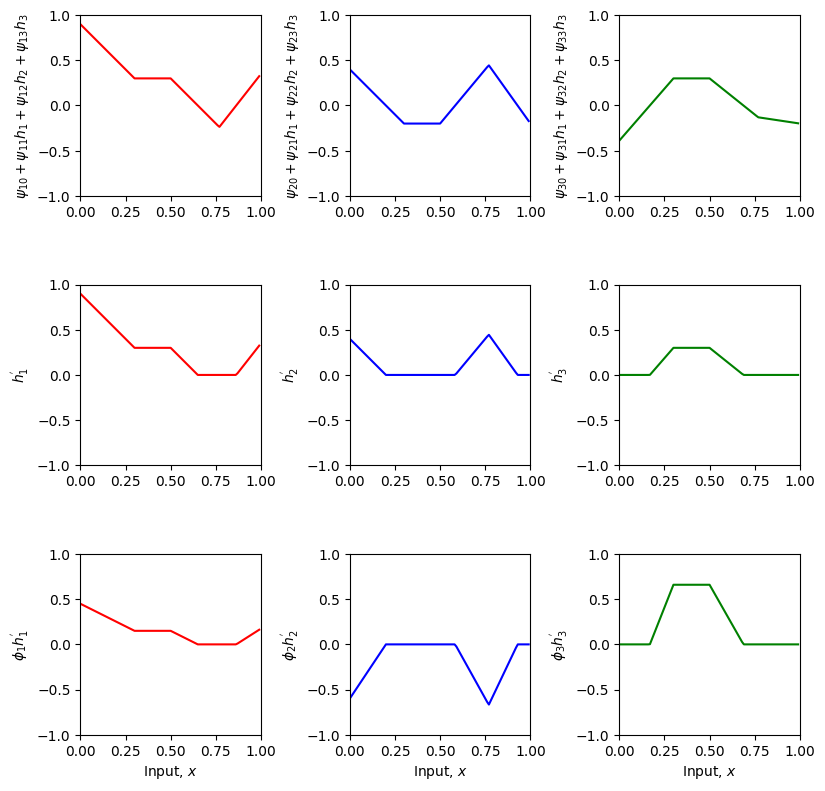

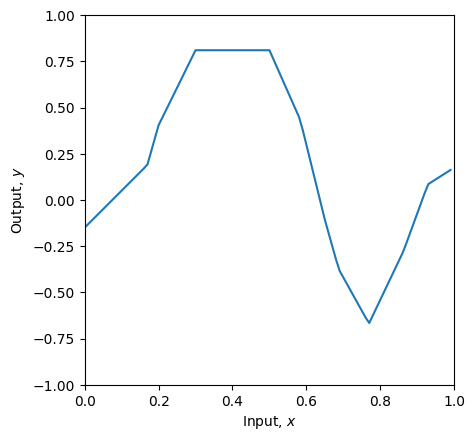

In [26]:
# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network
y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime \
    = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime)

### Figure Explanation

* The first row of plots are the _preactivations_ of the second layer.
* The second row of plots are the _activations_ of the second layer.
* The third row of plots are the _weighted activations_ of the second layer.
* The last plot is the _output_ of the network.

### Optional Questions

To test your understanding of this, consider:

1. What would happen if we increase $\psi_{1,0}$?
2. What would happen if we multiplied $\psi_{2,0}, \psi_{2,1}, \psi_{2,2},  \psi_{2,3}$ by -1?
3. What would happen if set $\phi_{3}$ to -1?

You can rerun the code to see if you were correct.



---


##  Section 3 -- Deep neural networks

This section investigates converting neural networks to matrix form.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

In [27]:
# # Plot the shallow neural network.  We'll assume input in is range [-1,1] and output [-1,1]
def plot_neural(x, y):
  fig, ax = plt.subplots()
  ax.plot(x.T,y.T)
  ax.set_xlabel('Input'); ax.set_ylabel('Output')
  ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
  ax.set_aspect(1.0)
  plt.show()

For reference, we'll compute our first shallow network again and plot it.  We'll just consider the inputs and outputs over the range [-1,1].

n1_in.shape: (1, 200)


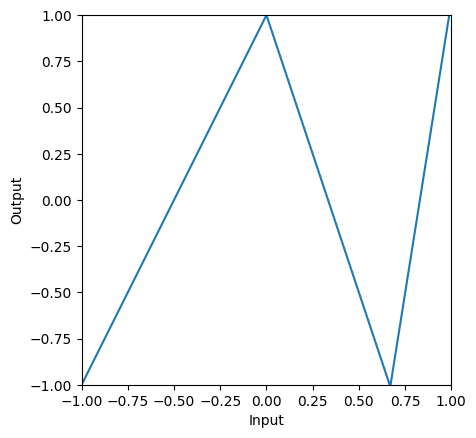

In [28]:
# Now lets define network 1 parameters same as we did before.
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Define a range of input values
n1_in = np.arange(-1,1,0.01).reshape([1,-1])
print("n1_in.shape:", n1_in.shape)

# We run the neural network for each of these input values
n1_out, *_ = shallow_1_1_3(n1_in, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
# And then plot it
plot_neural(n1_in, n1_out)

<!-- BEGIN QUESTION -->

### Question 3.1 (5 points)

Now we'll define the same neural network, but this time, we will  use matrix form as in equation 4.15.  When you get this right, it will draw the same plot as above.

So

$$
\mathbf{\beta_0}
=
\begin{bmatrix}
\theta_{10} \\
\theta_{20} \\
\theta_{30} \\
\end{bmatrix}
,
\hspace{1cm}
\mathbf{\Omega_0}
=
\begin{bmatrix}
\theta_{11} \\
\theta_{21} \\
\theta_{31} \\
\end{bmatrix}
,
\hspace{1cm}
\textrm{etc.}
$$


Defining the parameter vectors and matrices of the network.
beta_0.shape should be (3,1). You got: (3, 1)
Omega_0.shape should be (3,1). You got: (3, 1)
beta_1.shape should be (1,1). You got: (1, 1)
Omega_1.shape should be (3,1). You got: (3, 1)

Applying the forward pass of the network to the entire input array.
h1_pre.shape should be (3,200). You got: (3, 200)
h1.shape should be (3,200). You got: (3, 200)
n1_out.shape should be (1,200). You got: (3, 200)


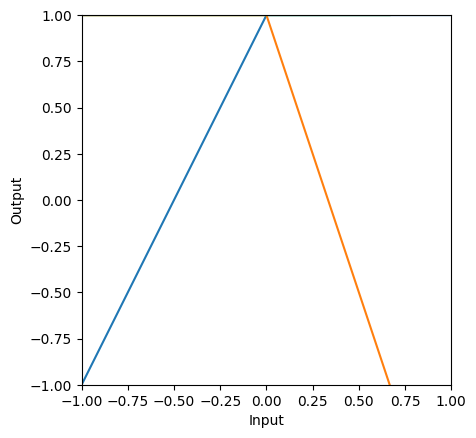

In [29]:
# TODO Fill in the values of the beta and Omega matrices with the n1_theta and
# n1_phi parameters that define the network above.
#
# NOTE: The matrices in the lecture and textbook are conventionally indexed with
# a_11 in the top left corner, but ndarrays start at [0,0].
#
# You can make the assignment with np.array([...]) or np.array([[...]])

print("Defining the parameter vectors and matrices of the network.")
beta_0 = np.array([[0.0], [0.0], [-0.67]])
print("beta_0.shape should be (3,1). You got:", beta_0.shape)

Omega_0 = np.array([[-1.],[ 1.], [1.]])
print("Omega_0.shape should be (3,1). You got:", Omega_0.shape)

beta_1 = np.array([[1.0]])
print("beta_1.shape should be (1,1). You got:", beta_1.shape)

Omega_1 = np.array([[-2.0], [-3.0], [9.3]])
print("Omega_1.shape should be (3,1). You got:", Omega_1.shape)


# We can use the broadcasting feature of numpy to apply our network to the entire
# input array.

print("\nApplying the forward pass of the network to the entire input array.")
# Let's first calculate the preactivations for the first layer.
h1_pre = beta_0 + (Omega_0 @ n1_in)
print("h1_pre.shape should be (3,200). You got:", h1_pre.shape)

# and then apply the activation function.
h1 = ReLU(h1_pre)
print("h1.shape should be (3,200). You got:", h1.shape)

# Now we can calculate the output of the network.
n1_out = beta_1 + (Omega_1 * h1)
print("n1_out.shape should be (1,200). You got:", n1_out.shape)

# Draw the network and check that it looks the same as the non-matrix case
plot_neural(n1_in, n1_out)

<!-- END QUESTION -->

This graph should look the same as the one above.

### Question 3.2 (5 points)

Now let's make a deep network with 3 hidden layers as in Figure 4.6.

It will have:
- $D_i=4$ inputs,
- $D_1=5$ neurons  in the first layer,
- $D_2=2$ neurons in the second layer and
- $D_3=4$ neurons in the third layer, and
- $D_o = 1$ output.  

Consult figure 4.6 and equations 4.15 for guidance.

In [30]:
# define sizes
D_i=4; D_1=5; D_2=2; D_3=4; D_o=1

# We'll choose the inputs and parameters of this network randomly using np.random.normal

# For example, we'll set the input using
n_data = 8;
np.random.seed(42)
x = np.random.normal(size=(D_i, n_data))
print(f"Our input data points shape is: {x.shape}")

# TODO initialize the parameters randomly with the correct sizes
#  ... = np.random.normal(size=(...))
# Complete the lines below
beta_0 = np.random.normal(size=(5, 1))
Omega_0 = np.random.normal(size=(5, 4))
beta_1 = np.random.normal(size=(2, 1))
Omega_1 = np.random.normal(size=(2, 5))
beta_2 = np.random.normal(size=(4, 1))
Omega_2 = np.random.normal(size=(4, 2))
beta_3 = np.random.normal(size=(1, 1))
Omega_3 = np.random.normal(size=(1, 4))


# Again, with broadcasting, we can apply the network to the entire
# input array.
h1_pre = beta_0 + (Omega_0 @ x)
h1 = ReLU(h1_pre)
h2_pre = beta_1 + (Omega_1 @ h1)
h2 = ReLU(h2_pre)
h3_pre = beta_2 + (Omega_2 @ h2)
h3 = ReLU(h3_pre)
y = beta_3 + (Omega_3 @ h3)

print("Shapes", Omega_3.shape, h3.shape)

if h1.shape[0] is not D_1 or h1.shape[1] is not n_data:
  print("h1 is wrong shape")
if h2.shape[0] is not D_2 or h1.shape[1] is not n_data:
  print("h2 is wrong shape")
if h3.shape[0] is not D_3 or h1.shape[1] is not n_data:
  print("h3 is wrong shape")
if y.shape[0] is not D_o or h1.shape[1] is not n_data:
  print("Output is wrong shape")

# Print the inputs and outputs (3 decimal places)
with np.printoptions(precision=3, suppress=True):
  print("Input data points")
  print(x.shape)
  print(f"x: {x}")
  print("Output data points")
  print(y.shape)
  print(f"y: {y}")


Our input data points shape is: (4, 8)
Shapes (1, 4) (4, 8)
Input data points
(4, 8)
x: [[ 0.497 -0.138  0.648  1.523 -0.234 -0.234  1.579  0.767]
 [-0.469  0.543 -0.463 -0.466  0.242 -1.913 -1.725 -0.562]
 [-1.013  0.314 -0.908 -1.412  1.466 -0.226  0.068 -1.425]
 [-0.544  0.111 -1.151  0.376 -0.601 -0.292 -0.602  1.852]]
Output data points
(1, 8)
y: [[-1.144 -1.142 -1.299 -1.113 -1.188 -1.745 -1.156 -1.144]]


In [ ]:
grader.check("q3-2")

---

**End of notebook**

---